In [16]:
import pandas as pd
df = pd.read_csv("../Dataset/Decision_Tree_hw1.csv")
df

,Feature 1,Feature 2,Class
0,Sunny,Hot,No
1,Sunny,Mild,No
2,Overcast,Hot,Yes
3,Rainy,Cool,Yes
4,Rainy,Mild,Yes
5,Rainy,Hot,No


In [17]:
# 1

from math import log2
overcast_subset = df[df['Feature 1'] == 'Overcast']
class_counts = overcast_subset['Class'].value_counts()

entropy_of_Overcast = 0
total = len(overcast_subset)
for count in class_counts:
    t = count / total
    entropy_of_Overcast -= t * log2(t)

entropy_of_Overcast

0.0

In [18]:
# 2
from collections import Counter

def entropy(data):
    total = len(data)
    counts = Counter(data)
    return -sum((count/total) * log2(count/total) for count in counts.values())

entropy_s = entropy(df['Class'])

feature2_values = df['Feature 2'].unique()
weighted_entropy = 0

for val in feature2_values:
    subset = df[df['Feature 2'] == val]
    e = entropy(subset['Class'])
    weighted_entropy += len(subset) / len(df) * e

info_gain_feature2 = entropy_s - weighted_entropy
info_gain_feature2

0.20751874963942196

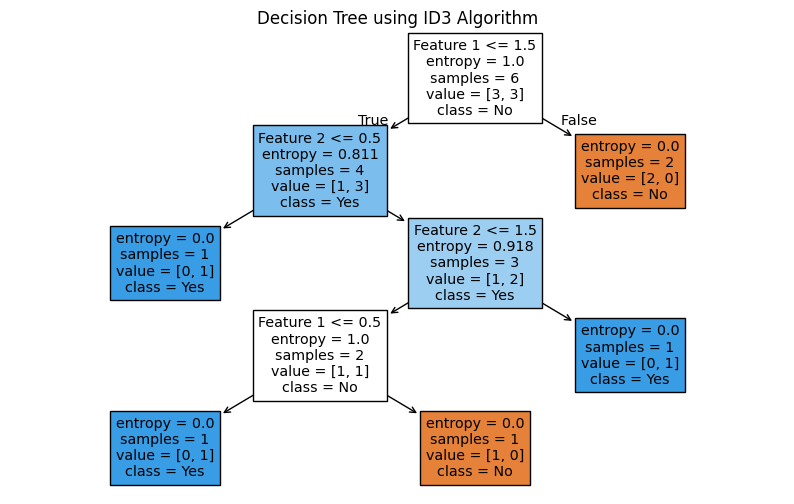

In [19]:
# 3

from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

df_encoded = df.copy()
for col in ['Feature 1', 'Feature 2', 'Class']:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

X = df_encoded[['Feature 1', 'Feature 2']]
y = df_encoded['Class']

clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X, y)

plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=['Feature 1', 'Feature 2'], class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree using ID3 Algorithm")
plt.show()